In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("true_car_listings.csv")

In [4]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [5]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [6]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [8]:
outlier_price = ( df.quantile(0.75)["Price"] - df.quantile(0.25)["Price"] ) * 1.5
outlier_priceX = ( df.quantile(0.75)["Price"] - df.quantile(0.25)["Price"] ) * 3

In [7]:
outlier_price

20992.5

In [8]:
outlier_priceX

41985.0

In [8]:
df2 = df.drop(df[(df.Price > df.quantile(0.75)["Price"] + outlier_priceX)|\
                 (df.Price <  df.quantile(0.25)["Price"]- outlier_priceX)].index)


In [32]:
df.shape 

(852122, 8)

In [31]:
df2.shape 

(846635, 8)

In [13]:
df2 = df.drop(df[(df.Price > df.quantile(0.75)["Price"] + outlier_price)|\
                 (df.Price <  df.quantile(0.25)["Price"]- outlier_price)].index)

In [34]:
df.shape 

(852122, 8)

In [35]:
df2.shape 

(824097, 8)

In [9]:
outlier_mileage = ( df.quantile(0.75)["Mileage"] - df.quantile(0.25)["Mileage"] ) * 1.5
outlier_mileageX = ( df.quantile(0.75)["Mileage"] - df.quantile(0.25)["Mileage"] ) * 3

In [9]:
outlier_mileage

72525.0

In [10]:
outlier_mileageX

145050.0

In [38]:
df3 = df.drop(df[(df.Mileage > df.quantile(0.75)["Mileage"] + outlier_mileageX)|\
                 (df.Mileage <  df.quantile(0.25)["Mileage"]- outlier_mileageX)].index)


In [39]:
df.shape 

(852122, 8)

In [40]:
df3.shape 

(848772, 8)

In [15]:
df3 = df.drop(df[(df.Mileage > df.quantile(0.75)["Mileage"] + outlier_mileage)|\
                 (df.Mileage <  df.quantile(0.25)["Mileage"]- outlier_mileage)].index)


In [42]:
df.shape 

(852122, 8)

In [43]:
df3.shape 

(820524, 8)

In [11]:
outlier_yearX = ( df.quantile(0.75)["Year"] - df.quantile(0.25)["Year"] ) * 3
outlier_year = ( df.quantile(0.75)["Year"] - df.quantile(0.25)["Year"] ) * 1.5

In [11]:
outlier_year

6.0

In [12]:
outlier_yearX

12.0

In [45]:
df4 = df.drop(df[(df.Year > df.quantile(0.75)["Year"] + outlier_yearX)|\
                 (df.Year <  df.quantile(0.25)["Year"]- outlier_yearX)].index)

In [46]:
df.shape 

(852122, 8)

In [47]:
df4.shape 

(849498, 8)

In [17]:
df4 = df.drop(df[(df.Year > df.quantile(0.75)["Year"] + outlier_year)|\
                 (df.Year <  df.quantile(0.25)["Year"]- outlier_year)].index)

In [49]:
df.shape 

(852122, 8)

In [50]:
df4.shape 

(816410, 8)

In [30]:
df["Price"].max()

499500

In [31]:
df2["Price"].max()

47987

In [33]:
df3["Mileage"].max()

144711

In [34]:
df["Mileage"].max()

2856196

In [22]:
df["Year"].min()

1997

In [23]:
df4["Year"].min()

2006

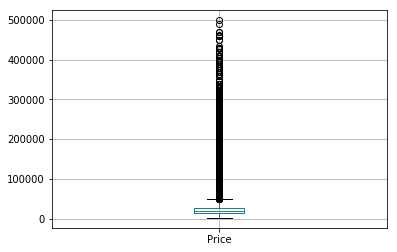

In [66]:
df.boxplot(column='Price')

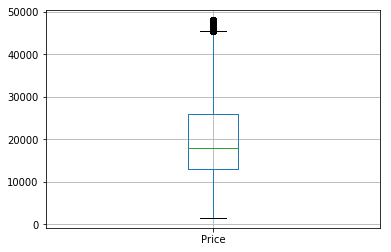

In [67]:
df2.boxplot(column='Price')

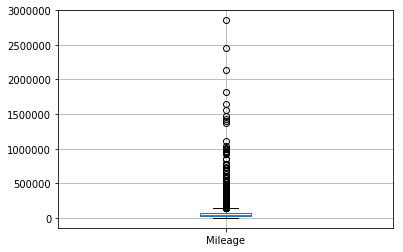

In [68]:
df.boxplot(column='Mileage')

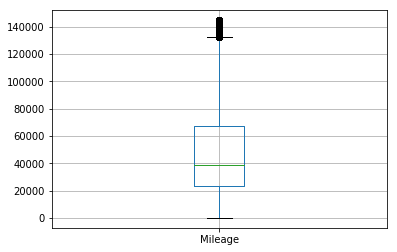

In [69]:
df3.boxplot(column='Mileage')

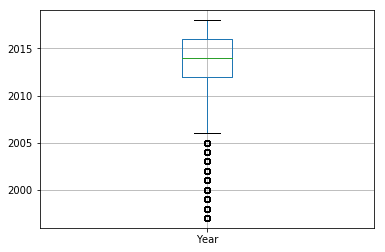

In [70]:
df.boxplot(column='Year')

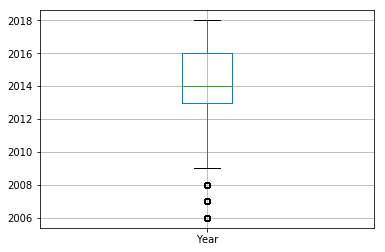

In [71]:
df4.boxplot(column='Year')

In [21]:
"df2.to_csv('trataPrice.csv', index=False)"

PermissionError: [Errno 13] Permission denied: 'trataPrice.csv'

In [5]:
dfp = pd.read_csv("trataPrice.csv")
dfp.shape

(824097, 8)

In [12]:
dfm = dfp.drop(dfp[(dfp.Mileage > df.quantile(0.75)["Mileage"] + outlier_mileage)|\
                 (dfp.Mileage <  df.quantile(0.25)["Mileage"]- outlier_mileage)].index)


In [14]:
dfm.shape

(792523, 8)

In [16]:
dfm.to_csv('trataMileage.csv', index=False)

In [17]:
dfm = pd.read_csv("trataMileage.csv")
dfm.shape

(792523, 8)

In [19]:
dfy = dfm.drop(dfm[(dfm.Year > df.quantile(0.75)["Year"] + outlier_year)|\
                 (dfm.Year <  df.quantile(0.25)["Year"]- outlier_year)].index)

In [20]:
dfy.shape

(770733, 8)

In [21]:
dfy.to_csv('trataYear.csv', index=False)

In [40]:
dff = dfy.sort_values(['Make', 'Model','Price','Year'])
dff.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
203,15490,2015,40131,Kennesaw,GA,19VDE1F34FE007892,Acura,ILX4dr
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed
1123,10790,2013,111751,Fredericksburg,VA,19VDE1F36DE014999,Acura,ILX5-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed


In [32]:
dff = dff.drop(columns = "Vin")

In [38]:
dff.head()

,Price,Year,Mileage,City,State,Make,Model
203,15490,2015,40131,Kennesaw,GA,Acura,ILX4dr
9,9995,2013,63887,El Paso,TX,Acura,ILX5-Speed
1123,10790,2013,111751,Fredericksburg,VA,Acura,ILX5-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed


In [39]:
dff.to_csv('final.csv', index=False)

In [42]:
df = df.drop(columns = "Vin")

In [43]:
df = df.sort_values(['Make', 'Model','Price','Year'])
df.head()

,Price,Year,Mileage,City,State,Make,Model
11093,39795,1999,93865,Indianapolis,IN,AM,General
11095,45000,1998,79163,Dallas,TX,AM,General
11094,46795,2000,64142,South River,NJ,AM,General
11096,48900,2000,73204,Fredericksburg,VA,AM,General
11098,49999,1998,118000,Newnan,GA,AM,General


In [44]:
df.to_csv('inicio.csv', index=False)

In [46]:
fim = pd.read_csv("final.csv")

In [45]:
inicio =  pd.read_csv("inicio.csv")

In [47]:
fim.shape

(770733, 7)

In [48]:
inicio.shape

(852122, 7)

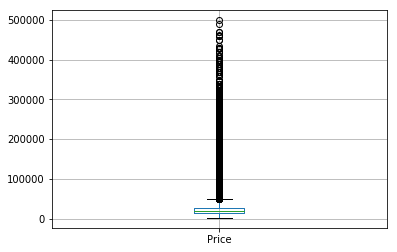

In [49]:
inicio.boxplot(column='Price')

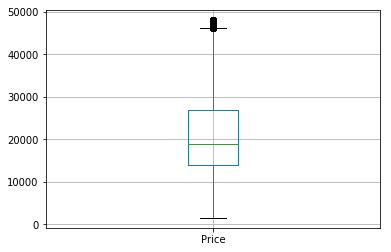

In [50]:
fim.boxplot(column='Price')

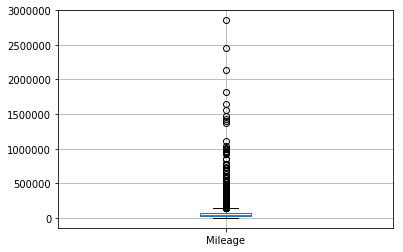

In [51]:
inicio.boxplot(column='Mileage')

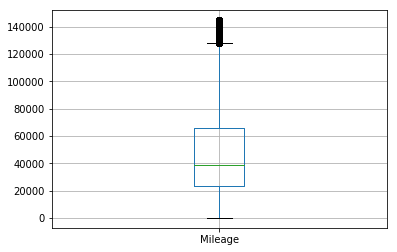

In [52]:
fim.boxplot(column='Mileage')

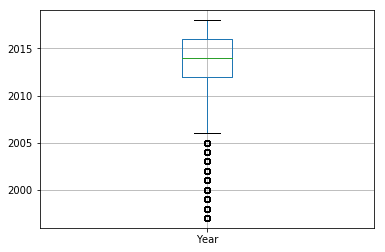

In [53]:
inicio.boxplot(column='Year')

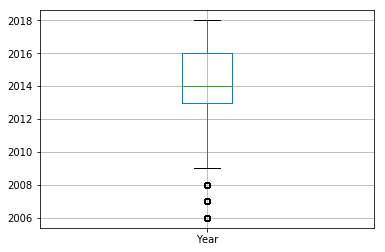

In [54]:
fim.boxplot(column='Year')

In [55]:
fim

,Price,Year,Mileage,City,State,Make,Model
0,15490,2015,40131,Kennesaw,GA,Acura,ILX4dr
1,9995,2013,63887,El Paso,TX,Acura,ILX5-Speed
2,10790,2013,111751,Fredericksburg,VA,Acura,ILX5-Speed
3,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
4,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
5,11300,2013,90585,Westampton,NJ,Acura,ILX5-Speed
6,11700,2013,87748,Wilkes-Barre,PA,Acura,ILX5-Speed
7,11890,2014,77898,Greatneck,NY,Acura,ILX5-Speed
8,11982,2013,69027,Lakewood,NJ,Acura,ILX5-Speed
9,11995,2013,104111,Louisville,KY,Acura,ILX5-Speed
